# <center><font color=greev>ПРАКТИКА. ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи

К вам как опытному дата-сайентисту обратилась HR-агенство. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Агенство хочет ответить на следующие вопросы, касающиеся зарплат у специалистов Data Scientist:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Необходимо исследовать данные и сделать выводы по полученным результатам. Подкрепить свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверить, являются ли выводы статистически значимыми.

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о выплатах зарплат специалистам Data Scientist различных компаний.

Данные содержат следующие столбцы:
* *work_year* — год, в котором была выплачена зарплата;
* *experience_level* — опыт работы на этой должности в течение года со следующими возможными значениями:
 * EN — Entry-level/Junior;
 * MI — Mid-level/Intermediate;
 * SE — Senior-level/Expert;
 * EX — Executive-level/Director;
* *employment_type* — 	тип трудоустройства для этой роли:
 * PT — неполный рабочий день;
 * FT — полный рабочий день;
 * CT — контракт;
 * FL — фриланс;
* *job_title* — 	роль, в которой соискатель работал в течение года;
* *salary* — общая выплаченная валовая сумма заработной платы;
* *salary_currency* — валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
* *salary_in_usd* — зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
* *employee_residence* — 	основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
* *remote_ratio* — 	общий объём работы, выполняемой удалённо. Возможные значения:
 * 0 — удалённой работы нет (менее 20 %);
 * 50 — частично удалённая работа;
 * 100 — полностью удалённая работа (более 80 %);
* *company_location* — 	страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166;
* *company_size* — 	среднее количество людей, работавших в компании в течение года:
 * S — менее 50 сотрудников (небольшая компания);
 * M — от 50 до 250 сотрудников (средняя компания);
 * L — более 250 сотрудников (крупная компания).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook")
sns.set_palette("Set2")

In [2]:
# загружаем датасет
data = pd.read_csv('ds_salaries.zip', index_col=[0])
display(data.head())
display(data.tail())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [3]:
# задаём уровень значимости
alpha = 0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
print('В датасете {} записей (без пропущенных значений).'.format(data.shape[0]))

В датасете 607 записей (без пропущенных значений).


Проверим данные на наличие полных дубликатов:

In [6]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 42


In [7]:
# Удаляем дубликаты
data.drop_duplicates(inplace=True)
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 0


In [8]:
# Удалим лишние столбцы:
data = data.drop(['salary', 'salary_currency'], axis=1)
print('Размер таблицы после удаления лишного столбца: {}'.format(data.shape))

Размер таблицы после удаления лишного столбца: (565, 9)


In [9]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


## Распределение зарплатных выплат по специалистам

In [10]:
# функция для переименования значений в столбцах для лучшей читабельности графиков
def rename_value(arg):
  if arg in d.keys():
    arg = d[arg]
  return arg

Для более удобного чтения графиков создадим дополнительные столбцы.

In [11]:
d = {'S':'Маленькие', 'M':'Средние', 'L':'Большие'}
data['company_size_rename'] = data['company_size'].apply(rename_value)

d = {'EN':'junior', 'MI':'middle', 'SE':'senior', 'EX':'director'}
data['experience_level_rename'] = data['experience_level'].apply(rename_value)

Сформулируем более точные вопросы и ответим на них, проверив ответ на статистическую значимость.

### Выросла ли зарплата специалистов Data Scientist в 2022 году по сравнению с 2021 годом?

In [12]:
data_scientist = data[data['job_title'] == 'Data Scientist']
data_agg = data_scientist.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Денежное содержание Data Scientist в зависимости от года')
data_agg

Денежное содержание Data Scientist в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


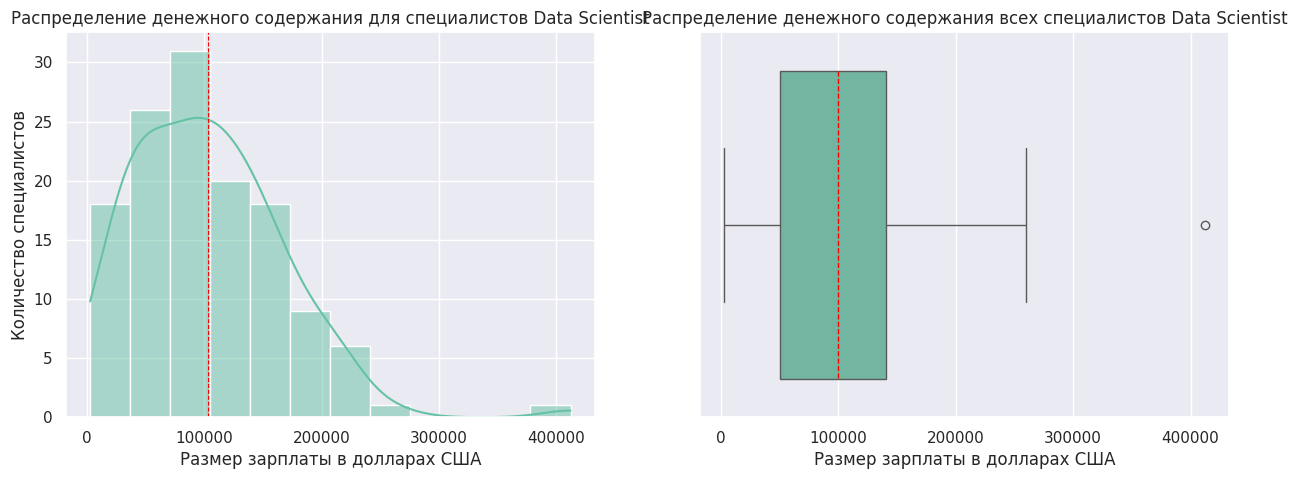

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data_scientist['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в долларах США', ylabel='Количество специалистов')
axes[0].set_title('Распределение денежного содержания для специалистов Data Scientist')
axes[0].axvline(data_scientist['salary_in_usd'].mean(), color='red', linestyle='--',\
    linewidth=0.8)

sns.boxplot(data_scientist['salary_in_usd'], ax=axes[1], orient='h',\
    medianprops={"color":"red", "linestyle":'--'})
axes[1].set(xlabel='Размер зарплаты в долларах США')
axes[1].set_title('Распределение денежного содержания всех специалистов Data Scientist')

plt.show()

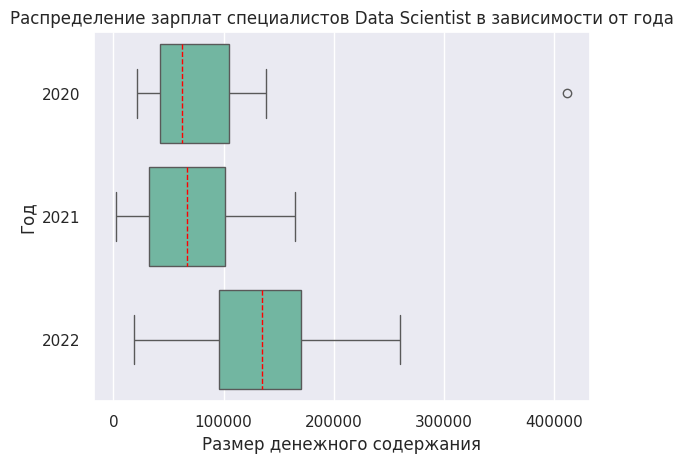

In [14]:
ax = sns.boxplot(data_scientist, x='salary_in_usd', y='work_year', orient='h',\
    medianprops={"color":"red", "linestyle":'--'})
ax.set(xlabel='Размер денежного содержания', ylabel='Год')
plt.title('Распределение зарплат специалистов Data Scientist в зависимости от года')
plt.show()

На первый взгляд распределение размера заработных выплат специалистов Data Scientist в зависиости от года различны. И в целом наблюдается тенденция роста зарплат 2022 года по отношению к 2021 году. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

### Была ли зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году?

In [15]:
data_scientist_2022 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2022]))]
data_agg_d_s = data_scientist_2022.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Денежное содержание специалистов Data Scientist и Data Engineer в 2022 году')
data_engineer_2022 = data[(data['job_title'] == 'Data Engineer') & (data['work_year'].isin([2022]))]
data_agg_d_e = data_engineer_2022.groupby('work_year')['salary_in_usd'].describe().round(2)
display(data_agg_d_s, data_agg_d_e)

Денежное содержание специалистов Data Scientist и Data Engineer в 2022 году


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2022,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2022,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0


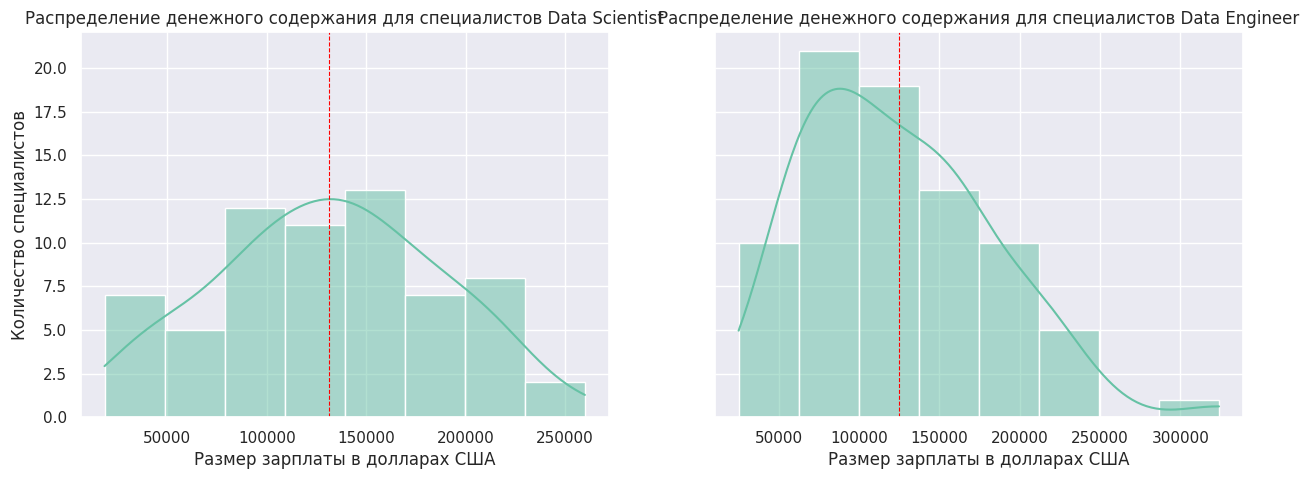

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.histplot(data_scientist_2022['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в долларах США', ylabel='Количество специалистов')
axes[0].set_title('Распределение денежного содержания для специалистов Data Scientist')
axes[0].axvline(data_scientist_2022['salary_in_usd'].mean(), color='red', linestyle='--',\
    linewidth=0.8)

sns.histplot(data_engineer_2022['salary_in_usd'], kde=True, ax=axes[1])
axes[1].set(xlabel='Размер зарплаты в долларах США', ylabel='Количество специалистов')
axes[1].set_title('Распределение денежного содержания для специалистов Data Engineer')
axes[1].axvline(data_engineer_2022['salary_in_usd'].mean(), color='red', linestyle='--',\
    linewidth=0.8)

plt.show()

На первый взгляд размер заработных выплат специалистов Data Scientist,
меньше чем у специалистов Data Engineer в 2022 году. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

### Различна ли зарплата специалистов Data Scientist в маленьких, средних и больших компаниях?

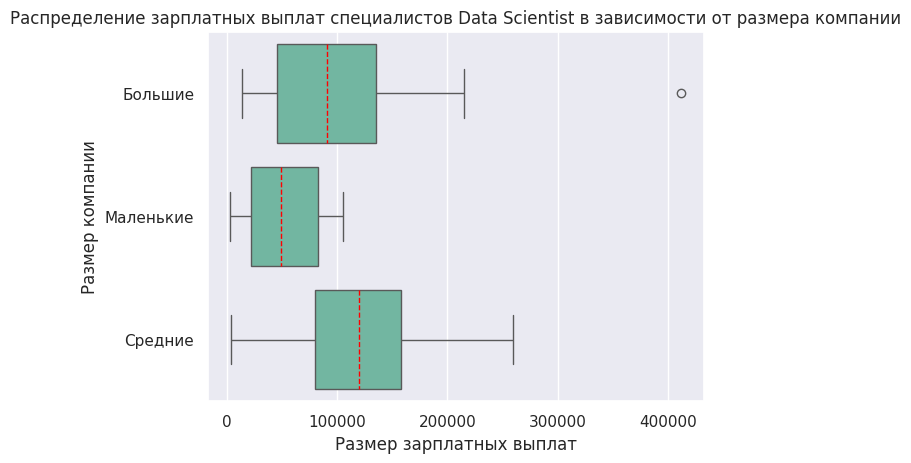

In [17]:
ax = sns.boxplot(data_scientist, x='salary_in_usd', y=data['company_size_rename'], orient='h',\
    medianprops={"color":"red", "linestyle":'--'})
ax.set(xlabel='Размер зарплатных выплат', ylabel='Размер компании')
plt.title('Распределение зарплатных выплат специалистов Data Scientist в зависимости от размера компании')
plt.show()

In [18]:
data_agg = data_scientist.groupby('company_size_rename')['salary_in_usd'].describe().round(2)
print('Зарплатные выплаты в зависимости от размера компании')
data_agg

Зарплатные выплаты в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size_rename,,,,,,,,
Большие,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
Маленькие,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0
Средние,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0


На первый взгляд распределение размера заработных выплат специалистов Data Scientist в зависиости от размера компании различны. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [19]:
data_agg_ds = data_scientist.groupby(data['company_size_rename'])['experience_level_rename'].describe().round(2)
print('Зависимость вакансий Data Scientist от опыта работы и размера компании')
display(data_agg_ds)
print()

data_engineer = data[(data['job_title'] == 'Data Engineer')]
data_agg_de = data_engineer.groupby(data['company_size_rename'])['experience_level_rename'].describe().round(2)
print('Зависимость вакансий Data Engineer от опыта работы и размера компании')
display(data_agg_de)

Зависимость вакансий Data Scientist от опыта работы и размера компании


,count,unique,top,freq
company_size_rename,,,,
Большие,43,3,middle,22
Маленькие,21,3,middle,12
Средние,66,3,senior,32



Зависимость вакансий Data Engineer от опыта работы и размера компании


,count,unique,top,freq
company_size_rename,,,,
Большие,34,3,middle,20
Маленькие,6,3,senior,3
Средние,81,4,senior,41


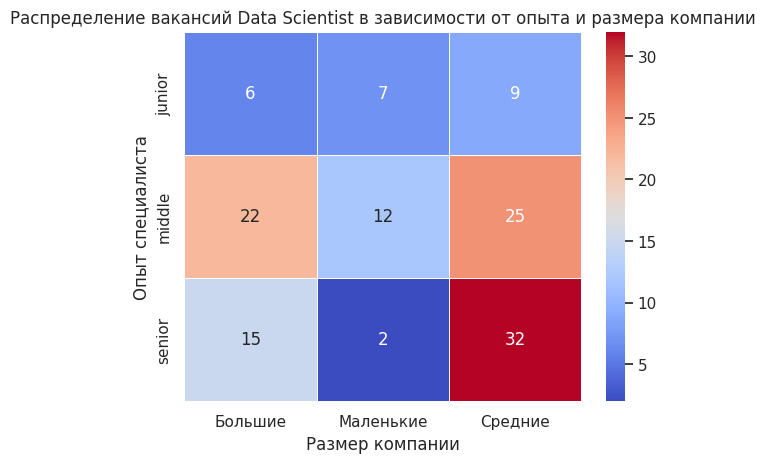

In [20]:
cross_tab = pd.crosstab(index=data_scientist['experience_level_rename'], columns=data['company_size_rename'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Опыт специалиста')
plt.title('Распределение вакансий Data Scientist в зависимости от опыта и размера компании')
plt.show()

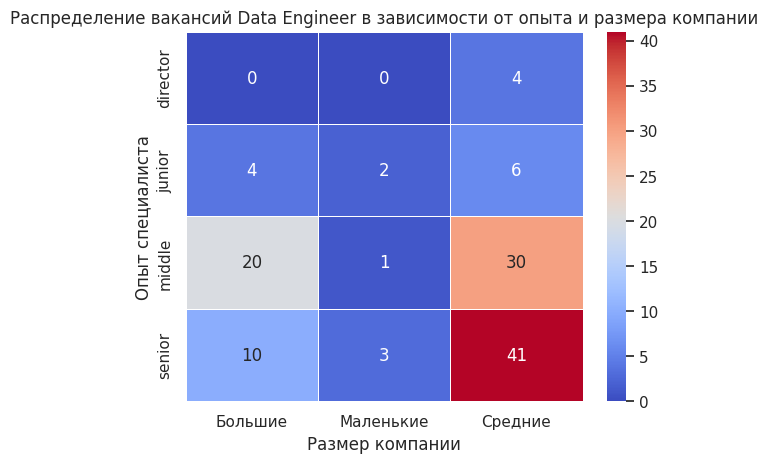

In [21]:
cross_tab = pd.crosstab(index=data_engineer['experience_level_rename'], columns=data['company_size_rename'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Опыт специалиста')
plt.title('Распределение вакансий Data Engineer в зависимости от опыта и размера компании')
plt.show()

На первый взгляд распределения наличия вакансий специалистов Data Scientist и Data Engineer в зависимости от размера компании различны. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

### Общее распределение заработной платы

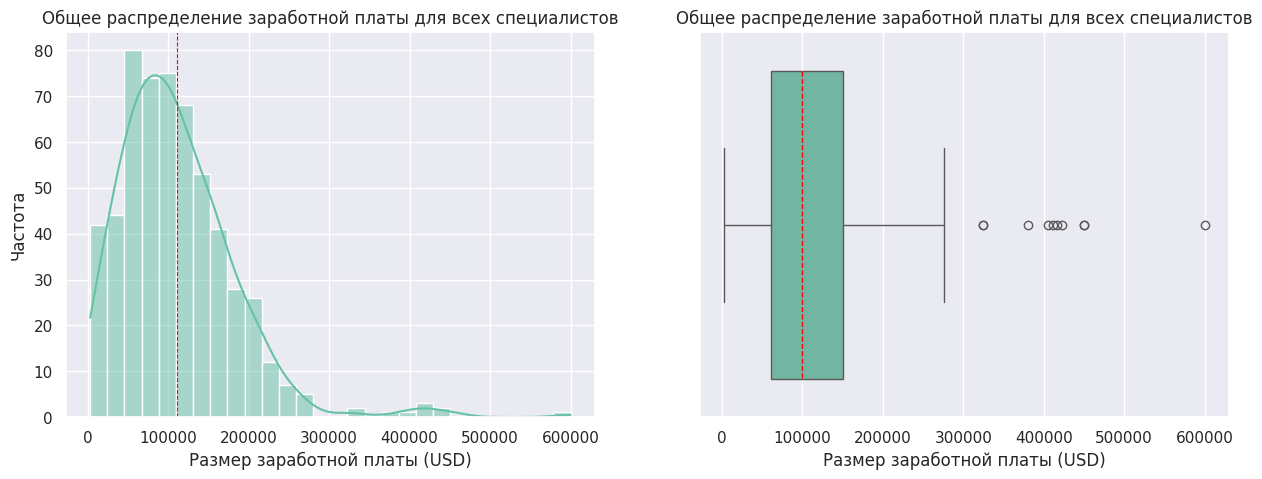

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы (USD)', ylabel='Частота')
axes[0].set_title('Общее распределение заработной платы для всех специалистов')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color":"red", "linestyle":'--'})
axes[1].set(xlabel='Размер заработной платы (USD)')
axes[1].set_title('Общее распределение заработной платы для всех специалистов')

plt.show()

In [23]:
data_agg = data['salary_in_usd'].describe().round(0).to_frame()
data_agg.columns = ['Общая выплаченная валовая сумма заработной платы']
data_agg

,Общая выплаченная валовая сумма заработной платы
count,565.0
mean,110610.0
std,72281.0
min,2859.0
25%,60757.0
50%,100000.0
75%,150000.0
max,600000.0


In [24]:
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное.')
else:
    print('Распределение нормальное.')

p-value = 0.000
Распределение не нормальное.


Распределение зарплат отлично от нормального, имеются выбросы.

### Можно ли утверждать, что зарплатные выплаты в зависимости от года растут?

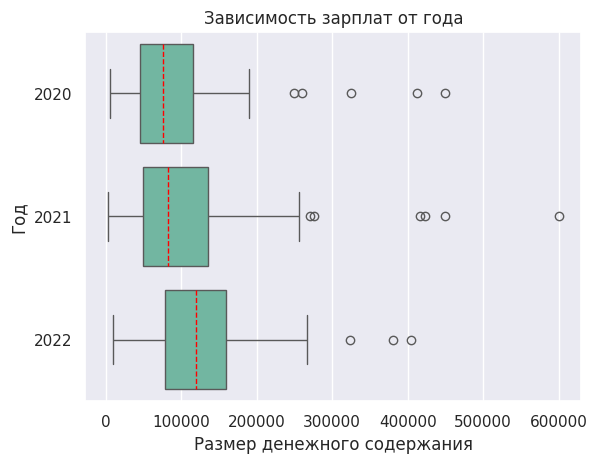

In [25]:
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h',\
                 medianprops={"color":"red", "linestyle":'--'})
ax.set(xlabel='Размер денежного содержания', ylabel='Год')
plt.title('Зависимость зарплат от года')
plt.show()

In [26]:
data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Денежное содержание в зависимости от года')
data_agg

Денежное содержание в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


На первый взгляд размер заработных выплат в зависимости от года растёт. Чтобы определить, является ли это статистически значимым, в следующем разделе мы проведём статистическое тестирование.

### Различны ли зарплатные выплаты в зависимости от размера компании?

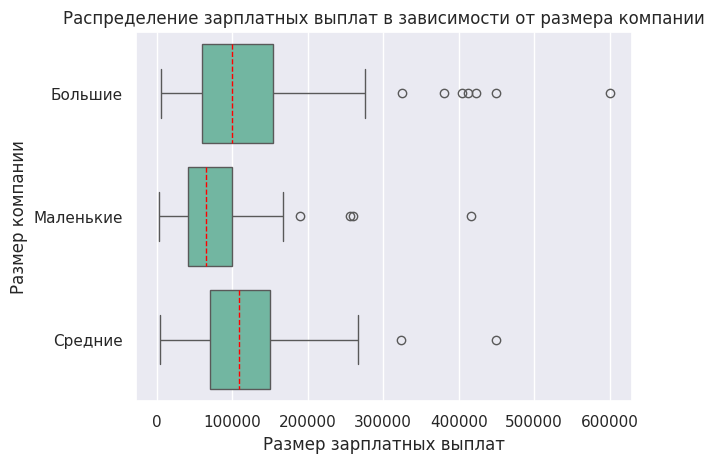

In [27]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_size_rename', orient='h',\
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплатных выплат', ylabel='Размер компании')
plt.title('Распределение зарплатных выплат в зависимости от размера компании')
plt.show()

In [28]:
data_agg = data.groupby('company_size_rename')['salary_in_usd'].describe().round(2)
print('Зарплатные выплаты в зависимости от размера компании')
data_agg

Зарплатные выплаты в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size_rename,,,,,,,,
Большие,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0
Маленькие,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0
Средние,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0


На первый взгляд заработные выплаты различны в зависимости от размера компании. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Различны ли зарплатные выплаты в зависимости от местонахождения компании?

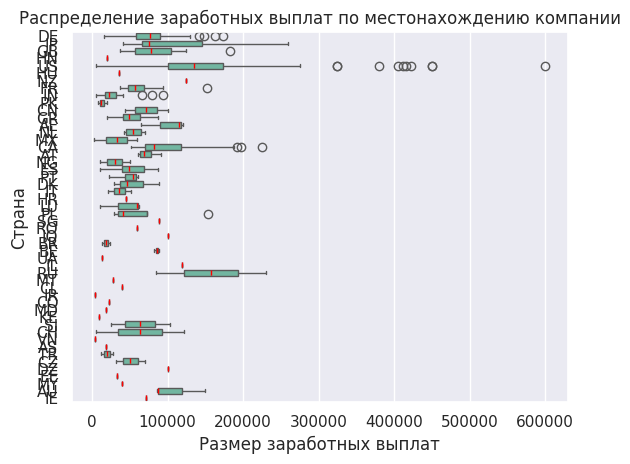

In [29]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_location', orient='h',\
                 medianprops={"color":"red", "linestyle":'--'})
ax.set(xlabel='Размер заработных выплат', ylabel='Страна')
plt.title('Распределение заработных выплат по местонахождению компании')
plt.show()

In [30]:
data_agg_loc = data.groupby('company_location')['salary_in_usd'].describe().round(2).sort_values('50%', ascending=False).head(10)
print('Распределение заработных выплат по местонахождению компании')
data_agg_loc

Распределение заработных выплат по местонахождению компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
RU,2.0,157500.00,102530.48,85000.0,121250.0,157500.0,193750.0,230000.0
US,318.0,144292.99,72524.34,5679.0,100000.0,135000.0,173000.0,600000.0
NZ,1.0,125000.00,NaN,125000.0,125000.0,125000.0,125000.0,125000.0
IL,1.0,119059.00,NaN,119059.0,119059.0,119059.0,119059.0,119059.0
AE,3.0,100000.00,30413.81,65000.0,90000.0,115000.0,117500.0,120000.0
DZ,1.0,100000.00,NaN,100000.0,100000.0,100000.0,100000.0,100000.0
IQ,1.0,100000.00,NaN,100000.0,100000.0,100000.0,100000.0,100000.0
SG,1.0,89294.00,NaN,89294.0,89294.0,89294.0,89294.0,89294.0
AU,3.0,108042.67,36337.91,86703.0,87064.0,87425.0,118712.5,150000.0


In [31]:
# возмём топ 10 стран по медианной зарплате
top_10_salary = data[data['company_location'].isin(data_agg_loc.index)]

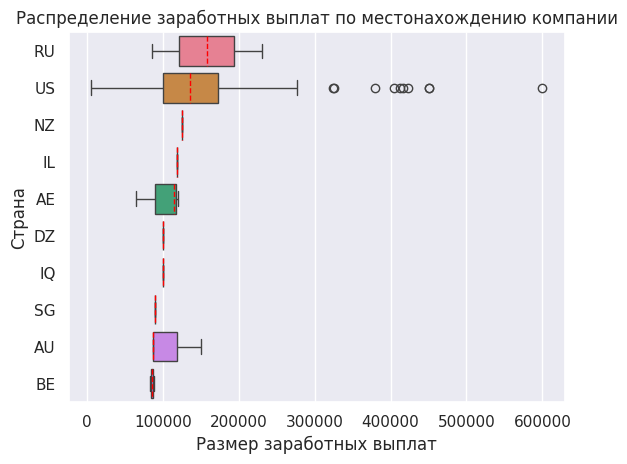

None

In [32]:
def boxplot_sorted(df, by, column):
  '''
  функция помогает показать боксплоты, отсортированными по медиане.
  df - датафрейм
  by - по какому признаку смотрим распределение виличины
  column - величина
  '''
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values(ascending=False)
  # df2[meds.index].boxplot(rot=90)

  ax = sns.boxplot(df2[meds.index],
                 orient='h',
                 medianprops={"color":"red", "linestyle":'--'})
  ax.set(xlabel='Размер заработных выплат', ylabel='Страна')
  plt.title('Распределение заработных выплат по местонахождению компании')
  plt.show()

display(boxplot_sorted(top_10_salary, by=['company_location'], column='salary_in_usd'))

На первый взгляд заработные выплаты различны для разных компаний с учетом их местонахождения. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Различны ли зарплатные выплаты в зависимости от опыта работы?

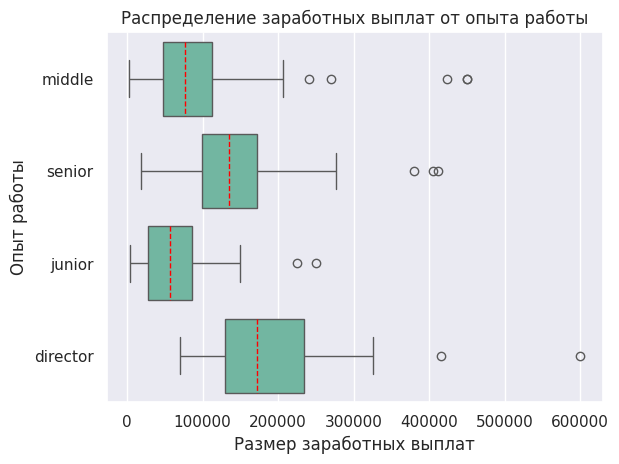

In [33]:
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level_rename', orient='h',\
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработных выплат', ylabel='Опыт работы')
plt.title('Распределение заработных выплат от опыта работы')
plt.show()

In [34]:
data_agg_exp = data.groupby('experience_level_rename')['salary_in_usd'].describe().round(2)
print('Распределение заработных выплат от опыта работы')
data_agg_exp

Распределение заработных выплат от опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level_rename,,,,,,,,
director,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
junior,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
middle,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
senior,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


На первый взгляд заработные выплаты различны в зависимости от опыта работы по занимаемой должности. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Соотношение денежных выплат специалистов категории Data Scientist и Data Engineer в зависимости от года, опыта работы и размера компании.

In [35]:
data_agg = data_scientist.groupby(['experience_level_rename', 'company_size_rename'])['salary_in_usd'].describe().round()
print('Зависимость зарплат Data Scientist от опыта работы и размера компании')
data_agg

Зависимость зарплат Data Scientist от опыта работы и размера компании


count      mean      std  \
experience_level_rename company_size_rename                             
junior                  Большие                6.0   38365.0  16034.0   
                        Маленькие              7.0   68569.0  30763.0   
                        Средние                9.0   56345.0  36341.0   
middle                  Большие               22.0   85263.0  40580.0   
                        Маленькие             12.0   35957.0  27898.0   
                        Средние               25.0  100973.0  46420.0   
senior                  Большие               15.0  154132.0  91928.0   
                        Маленькие              2.0   89488.0   2474.0   
                        Средние               32.0  152934.0  45392.0   

                                                 min       25%       50%  \
experience_level_rename company_size_rename                                
junior                  Большие              13400.0   31474.0   38322.0   
                        Маленькие            21669.0   50294.0   62726.0   
                        Средние               4000.0   28399.0   49646.0   
middle                  Большие              31615.0   42861.0   84244.0   
                        Маленькие             2859.0   12042.0   33864.0   
                        Средние              33808.0   65438.0  100000.0   
senior                  Большие              20171.0  111846.0  140400.0   
                        Маленькие            87738.0   88613.0   89488.0   
                        Средние              77684.0  119567.0  148000.0   

                                                  75%       max  
experience_level_rename company_size_rename                      
junior                  Большие               49297.0   58000.0  
                        Маленькие             95000.0  105000.0  
                        Средние               86703.0  100000.0  
middle                  Большие              116436.0  160000.0  
                        Маленькие             51682.0   82500.0  
                        Средние              130000.0  200000.0  
senior                  Большие              192650.0  412000.0  
                        Маленькие             90362.0   91237.0  
                        Средние              180000.0  260000.0

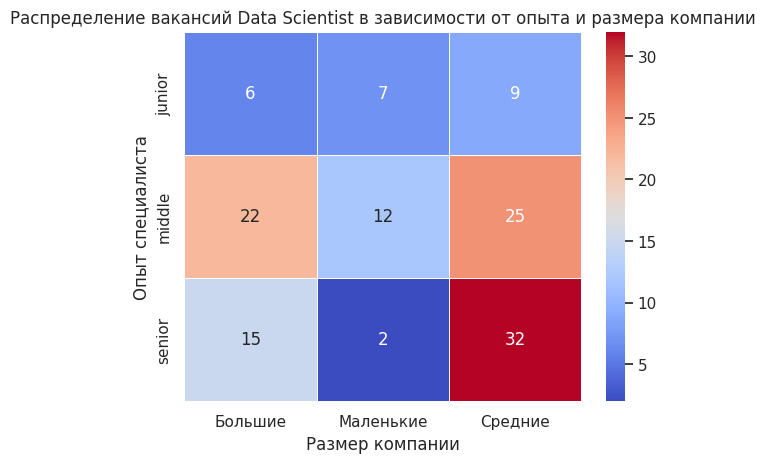

In [36]:
cross_tab = pd.crosstab(index=data_scientist['experience_level_rename'], columns=data['company_size_rename'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Опыт специалиста')
plt.title('Распределение вакансий Data Scientist в зависимости от опыта и размера компании')
plt.show()

In [37]:
data_agg = data_scientist.groupby(['experience_level_rename', 'work_year'])['salary_in_usd'].describe().round()
print('Зависимость зарплат Data Scientist от опыта работы по годам')
data_agg

Зависимость зарплат Data Scientist от опыта работы по годам


count      mean       std      min  \
experience_level_rename work_year                                       
junior                  2020         6.0   54983.0   28088.0  21669.0   
                        2021        11.0   53622.0   34540.0   4000.0   
                        2022         5.0   59508.0   33529.0  18442.0   
middle                  2020        11.0   71256.0   35724.0  35735.0   
                        2021        26.0   71430.0   48131.0   2859.0   
                        2022        22.0   99574.0   47753.0  31615.0   
senior                  2020         4.0  172916.0  160780.0  68428.0   
                        2021         7.0   91782.0   48653.0  20171.0   
                        2022        38.0  159229.0   43256.0  80000.0   

                                        25%       50%       75%       max  
experience_level_rename work_year                                          
junior                  2020        42254.0   50294.0   59875.0  105000.0  
                        2021        29075.0   49646.0   85000.0  100000.0  
                        2022        40000.0   52396.0   86703.0  100000.0  
middle                  2020        41339.0   62726.0   92416.0  138350.0  
                        2021        34812.0   67234.0  113500.0  160000.0  
                        2022        66412.0   95807.0  130000.0  200000.0  
senior                  2020        85535.0  105618.0  193000.0  412000.0  
                        2021        65438.0   87738.0  119346.0  165000.0  
                        2022       126405.0  154100.0  183825.0  260000.0

**Вывод:** Прирост зарплат по специальности Data Scientist наблюдается при максимальных значениях по опыту работы middle. В остальных случаях утверждать о приросте некорректно.

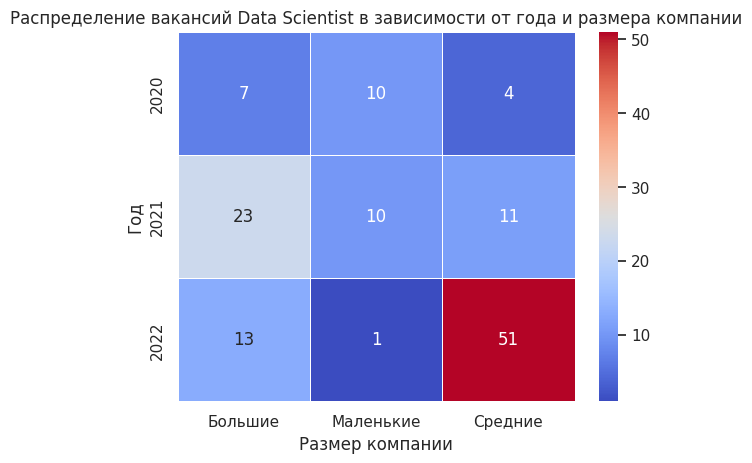

In [38]:
cross_tab = pd.crosstab(index=data_scientist['work_year'], columns=data['company_size_rename'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Год')
plt.title('Распределение вакансий Data Scientist в зависимости от года и размера компании')
plt.show()

In [39]:
data_agg = data_engineer.groupby(['experience_level_rename', 'company_size_rename'])['salary_in_usd'].describe().round()
print('Зависимость зарплат Data Engineer от опыта работы и размера компании')
data_agg

Зависимость зарплат Data Engineer от опыта работы и размера компании


count      mean      std  \
experience_level_rename company_size_rename                             
director                Средние                4.0  245500.0  55121.0   
junior                  Большие                4.0   59418.0  22038.0   
                        Маленькие              2.0   53344.0  16483.0   
                        Средние                6.0   60474.0  32739.0   
middle                  Большие               20.0   82641.0  44073.0   
                        Маленькие              1.0   66022.0      NaN   
                        Средние               30.0   85329.0  42458.0   
senior                  Большие               10.0  140328.0  49835.0   
                        Маленькие              3.0   75115.0  40772.0   
                        Средние               41.0  138615.0  47188.0   

                                                  min       25%       50%  \
experience_level_rename company_size_rename                                 
director                Средние              200000.0  212000.0  229000.0   
junior                  Большие               30428.0   48664.0   63621.0   
                        Маленькие             41689.0   47517.0   53344.0   
                        Средние               21637.0   47443.0   55193.0   
middle                  Большие               20000.0   52566.0   78329.0   
                        Маленькие             66022.0   66022.0   66022.0   
                        Средние                4000.0   64412.0   80713.0   
senior                  Большие               47899.0  103850.0  152300.0   
                        Маленькие             33511.0   55172.0   76833.0   
                        Средние               25000.0  108800.0  136994.0   

                                                  75%       max  
experience_level_rename company_size_rename                      
director                Средние              262500.0  324000.0  
junior                  Большие               74375.0   80000.0  
                        Маленькие             59172.0   65000.0  
                        Средние               63268.0  120000.0  
middle                  Большие              110000.0  200000.0  
                        Маленькие             66022.0   66022.0  
                        Средние               98864.0  206699.0  
senior                  Большие              177700.0  209100.0  
                        Маленькие             95916.0  115000.0  
                        Средние              165000.0  243900.0

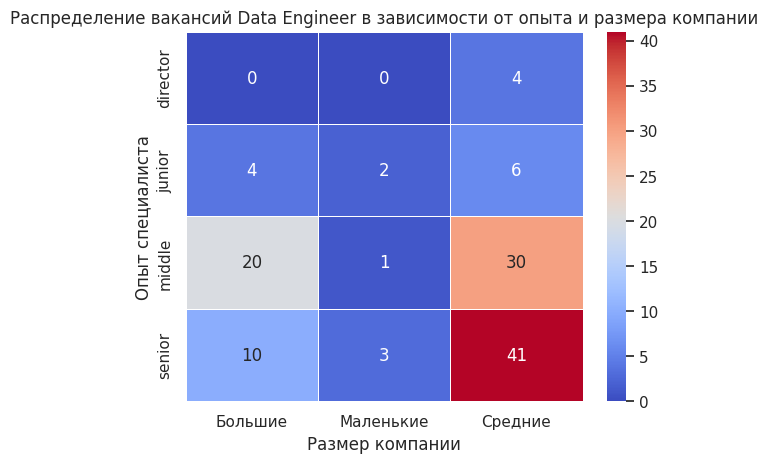

In [40]:
cross_tab = pd.crosstab(index=data_engineer['experience_level_rename'], columns=data['company_size_rename'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Опыт специалиста')
plt.title('Распределение вакансий Data Engineer в зависимости от опыта и размера компании')
plt.show()

In [41]:
data_agg = data_engineer.groupby(['experience_level_rename', 'work_year'])['salary_in_usd'].describe().round()
print('Зависимость зарплат Data Engineer от опыта работы по годам')
data_agg

Зависимость зарплат Data Engineer от опыта работы по годам


count      mean      std       min  \
experience_level_rename work_year                                       
director                2022         4.0  245500.0  55121.0  200000.0   
junior                  2020         2.0   48216.0   9230.0   41689.0   
                        2021         5.0   53916.0  26184.0   21637.0   
                        2022         5.0   68239.0  29789.0   45807.0   
middle                  2020         6.0  100657.0  23701.0   70139.0   
                        2021        20.0   71989.0  49637.0    4000.0   
                        2022        25.0   89399.0  38022.0   49461.0   
senior                  2020         3.0   89803.0  85345.0   33511.0   
                        2021         6.0  125519.0  34909.0   76833.0   
                        2022        45.0  139763.0  47188.0   25000.0   

                                        25%       50%       75%       max  
experience_level_rename work_year                                          
director                2022       212000.0  229000.0  262500.0  324000.0  
junior                  2020        44952.0   48216.0   51479.0   54742.0  
                        2021        30428.0   65013.0   72500.0   80000.0  
                        2022        52351.0   58035.0   65000.0  120000.0  
middle                  2020        82098.0  108000.0  112154.0  130800.0  
                        2021        28281.0   70976.0  102500.0  200000.0  
                        2022        65949.0   78526.0   98158.0  206699.0  
senior                  2020        40705.0   47899.0  117950.0  188000.0  
                        2021       100962.0  132500.0  150000.0  165000.0  
                        2022       108800.0  136994.0  165400.0  243900.0

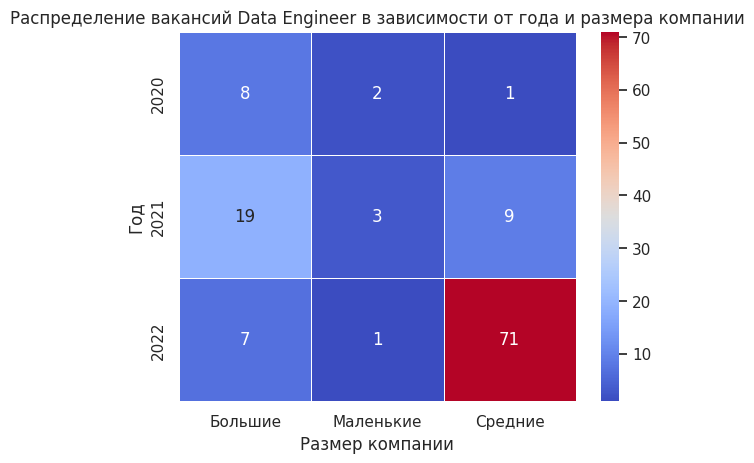

In [42]:
cross_tab = pd.crosstab(index=data_engineer['work_year'], columns=data['company_size_rename'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Год')
plt.title('Распределение вакансий Data Engineer в зависимости от года и размера компании')
plt.show()

## Статистический анализ данных



In [43]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


### Выросла ли зарплата специалистов Data Scientist в 2022 году по сравнению с 2021 годом?

**Сформулируем нулевую и альтернативные гипотезы**

***Нулевая гипотеза*** ($H_0$): средний размер зарплат специалистов Data Scientist в 2022 году ($μ_1$) статистически меньше либо равен размеру зарплат специалистов Data Scientist в 2021 году ($μ_2$).

$$ H_0 : μ_1 \leq μ_2$$

***Альтернативная гипотеза*** ($H_1$): средний размер зарплат специалистов Data Scientist в 2022 году ($μ_1$) статистически больше, чем размер размер зарплат специалистов Data Scientist в 2021 году ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

***Нулевая гипотеза*** ($H_0$): распределение данные является нормальным.

***Альтернативная гипотеза*** ($H_1$): распределение данных отлично от нормального.

In [44]:
# значения зарплатных выплат
data_scientist_22 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2022]))]
year_22 = data_scientist_22.loc[data_scientist['work_year']==2022, 'salary_in_usd']

data_scientist_21 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2021]))]
year_21 = data_scientist_21.loc[data_scientist['work_year']==2021, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist в 2022 году:')
result = stats.shapiro(year_22)
decision_normality(result[1])

print('Для Data Scientist в 2021 году:')
result = stats.shapiro(year_21)
decision_normality(result[1])

Для Data Scientist в 2022 году:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Scientist в 2021 году:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да.

Чтобы проверить нашу гипотезу, можно использовать ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ для сравнения средних значений распределений.

**Проведём тест**

In [45]:
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(year_22, year_21, alternative='greater', equal_var=True)
decision_hypothesis(p)


Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу в пользу альтернативной. **Средний размер зарплат специалистов Data Scientist в 2022 году статистически больше, чем средний размер зарплат специалистов Data Scientist в 2021 году** с вероятностью 95%.

### Была ли зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

***Нулевая гипотеза*** ($H_0$): размер зарплат для специалистов Data Scientist ($μ_1$) статистически больше либо равен размеру зарплат специалистов Data Engineer ($μ_2$) в 2022 году.

$$ H_0 : μ_1 \geq μ_2$$

***Альтернативная гипотеза*** ($H_1$): размер зарплат для специалистов Data Scientist ($μ_1$) статистически меньше размеру зарплат специалистов Data Engineer ($μ_2$) в 2022 году.
$$ H_1 : μ_1 < μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [46]:
# значения зарплатных выплат
data_scientist = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2022]))]
year_ds = data_scientist.loc[data_scientist['work_year']==2022, 'salary_in_usd']

data_engineer = data[(data['job_title'] == 'Data Engineer') & (data['work_year'].isin([2022]))]
year_de = data_engineer.loc[data_engineer['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist в 2022 году:')
result = stats.shapiro(year_ds)
decision_normality(result[1])

print('Для Data Engineer в 2022 году:')
result = stats.shapiro(year_de)
decision_normality(result[1])

Для Data Scientist в 2022 году:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer в 2022 году:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**


In [47]:
# проводим U-критерий Манна-Уитни
print('\nU-критерий Манна-Уитни')
_, p = stats.mannwhitneyu(year_ds, year_de)
decision_hypothesis(p)


U-критерий Манна-Уитни
p-value = 0.319
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

У нас нет оснований отвергнуть нулевую гипотезу, а значит у нас **нет оснований утвеждать, что размер зарплат для специалистов Data Scientist статистически больше размера зарплат специалистов Data Engineer** в 2022 году.

### Различна ли зарплата специалистов Data Scientist в маленьких, средних и больших компаниях?

**Сформулируем нулевую и альтернативные гипотезы**

***Нулевая гипотеза*** ($H_0$): размер зарплатных выплат специалистов Data Scientist не отличается в зависимости от размера компании: маленькие ($μ_1$), средние ($μ_2$) и большие ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

***Альтернативная гипотеза*** ($H_1$): размер зарплатных выплат специалистов Data Scientist отличается в зависимости от размера компании: маленькие ($μ_1$), средние ($μ_2$) и большие ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [48]:
# значения зарплатных выплат
data_scientist = data[(data['job_title'] == 'Data Scientist')]
data_scientist_l = data_scientist.loc[data_scientist['company_size']=='L', 'salary_in_usd']
data_scientist_m = data_scientist.loc[data_scientist['company_size']=='M', 'salary_in_usd']
data_scientist_s = data_scientist.loc[data_scientist['company_size']=='S', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для большых компаний:')
result = stats.shapiro(data_scientist_l)
decision_normality(result[1])

print('Для средних компаний:')
result = stats.shapiro(data_scientist_m)
decision_normality(result[1])

print('Для маленьких компаний:')
result = stats.shapiro(data_scientist_s)
decision_normality(result[1])


Для большых компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для средних компаний:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для маленьких компаний:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [49]:
# проводим тест
_, p = stats.kruskal(data_scientist_l, data_scientist_m, data_scientist_s)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу в пользу альтернативной, а значит **размер зарплатных выплат** специалистов Data Scientist с вероятностью 95% **статистически отличается** в зависимости от размера компании.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

***Нулевая гипотеза***: между специалистами Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

***Альтернативная гипотеза***: между специалистами Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Специалист»? — Категориальный.
* Сколько сравниваемых групп? — Две.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [50]:
data_c = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
cross_table = pd.crosstab(data_c['job_title'], data['company_size_rename'])

cross_table

company_size_rename,Большие,Маленькие,Средние
job_title,,,
Data Engineer,34,6,81
Data Scientist,43,21,66


In [51]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу в пользу альтернативной. **С вероятностью 95% существует статистически значимая взаимосвязь между специалистами Data Scientist и Data Engineer и размером компании.**

### Можно ли утверждать, что зарплатные выплаты в зависимости от года растут?

**Сформулируем нулевую и альтернативную гипотезы**

***Нулевая гипотеза*** ($H_0$): средний размер зарплат в 2020 году($μ_1$) статистически больше либо равен среднему размеру зарплат в 2021 году ($μ_2$). И средний размер зарплат в 2021 году($μ_2$) статистически больше либо равен среднему размеру зарплат в 2022 году ($μ_3$)

$$ H_0 : μ_1 \geq μ_2 \geq \mu_3$$

***Альтернативная гипотеза*** ($H_1$): средний размер зарплат в 2020 году ($μ_1$) статистически меньше, чем средний размер зарплат в 2021 году ($μ_2$). И средний размер зарплат в 2021 году ($μ_2$) статистически меньше, чем средний размер зарплат в 2022 году ($μ_3$)

$$ H_1 : μ_1 < μ_2 < \mu_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

***Нулевая гипотеза*** ($H_0$): распределение данные является нормальным.

***Альтернативная гипотеза*** ($H_1$): распределение данных отлично от нормального.

In [52]:
# значения зарплатных выплат
data_20 = data[data['work_year'].isin([2020])]['salary_in_usd']
data_21 = data[data['work_year'].isin([2021])]['salary_in_usd']
data_22 = data[data['work_year'].isin([2022])]['salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для 2020 года:')
result = stats.shapiro(data_20)
decision_normality(result[1])

print('Для 2021 года:')
result = stats.shapiro(data_21)
decision_normality(result[1])

print('Для 2022 года:')
result = stats.shapiro(data_22)
decision_normality(result[1])

Для 2020 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2022 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Краскела-Уолиса.

**Проведём тест**

In [53]:
# проводим тест
_, p = stats.kruskal(data_20, data_21, data_22)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**вывод**

Мы получили статистически значимые выводы, что (с вероятностью 95%) заработные выплаты в зависимости от года **растут**.

### Различны ли зарплатные выплаты в зависимости от размера компании?

**Сформулируем нулевую и альтернативную гипотезы**

***Нулевая гипотеза*** ($H_0$): зарплатные выплаты $\mu_1, \mu_2, \mu_3$ не зависят от размера компании.

$$ H_0 : μ_1 = μ_2 = \mu_3$$

***Альтернативная гипотеза*** ($H_1$): зарплатные выплаты $\mu_1, \mu_2, \mu_3$ зависят от размера компании.

$$ H_1 : μ_1 \neq μ_2 \neq \mu_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

***Нулевая гипотеза*** ($H_0$): распределение данные является нормальным.

***Альтернативная гипотеза*** ($H_1$): распределение данных отлично от нормального.

In [54]:
# значения зарплатных выплат
data_s = data[data['company_size']=='S']['salary_in_usd']
data_m = data[data['company_size']=='M']['salary_in_usd']
data_l = data[data['company_size']=='L']['salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для маленьких компаний:')
result = stats.shapiro(data_s)
decision_normality(result[1])

print('Для средних компаний:')
result = stats.shapiro(data_m)
decision_normality(result[1])

print('Для больших компаний:')
result = stats.shapiro(data_l)
decision_normality(result[1])

Для маленьких компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для средних компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для больших компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Краскела-Уолиса.

**Проведём тест**

In [55]:
# проводим тест
_, p = stats.kruskal(data_s, data_m, data_l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**вывод**

Мы получили **статистически** значимую информацию что с вероятностью 95% заработные выплаты в зависимости от размера компании **различны**.

### Различны ли зарплатные выплаты в зависимости от местонахождения компании?

**Сформулируем нулевую и альтернативную гипотезы**

***Нулевая гипотеза*** ($H_0$): зарплатные выплаты $\mu_1, \mu_2, \mu_3$ не зависят от местоположения компании.

$$ H_0 : μ_1 = μ_2 = \mu_3$$

***Альтернативная гипотеза*** ($H_1$): зарплатные выплаты $\mu_1, \mu_2, \mu_3$ зависят от местоположения компании.

$$ H_1 : μ_1 \neq μ_2 \neq \mu_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

***Нулевая гипотеза*** ($H_0$): распределение данные является нормальным.

***Альтернативная гипотеза*** ($H_1$): распределение данных отлично от нормального.

Исключим из данных записи с условием

    data[data['company_location']==country].shape[0] < 3

In [56]:
country_3 = data.copy()

In [57]:
s_less_3 = set()  # множество стран, у которых записей меньше 3

for c in data['company_location']:
  if data[data['company_location']==c].shape[0] < 3:
    s_less_3.add(c)

print(s_less_3)

{'RO', 'SI', 'CL', 'KE', 'BE', 'VN', 'IE', 'SG', 'IL', 'NZ', 'CZ', 'HR', 'MT', 'IT', 'UA', 'CO', 'CH', 'EE', 'HU', 'CN', 'AS', 'IR', 'IQ', 'HN', 'DZ', 'MD', 'MY', 'NG', 'RU'}


In [58]:
# удалим страны, у которых меньше трёх записей
country_three = country_3.query(f'company_location not in {list(s_less_3)}')

In [59]:
data_agg_loc_3 = country_three.groupby('company_location')['salary_in_usd'].describe().round(2).sort_values('50%', ascending=False)
data_agg_loc_3

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,318.0,144292.99,72524.34,5679.0,100000.00,135000.0,173000.00,600000.0
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
CA,28.0,100121.86,47080.71,52000.0,70518.00,81895.5,117374.75,225000.0
GB,46.0,81649.50,29846.70,37300.0,56915.50,78526.0,104316.50,183228.0
DE,27.0,81559.56,39903.44,15966.0,58669.00,76833.0,89694.00,173762.0
JP,6.0,114127.33,83584.64,41689.0,66283.25,75682.0,145341.00,260000.0
AT,4.0,72920.75,13332.78,61467.0,64003.50,69489.5,78406.75,91237.0
LU,3.0,43942.67,29451.01,10000.0,34551.00,59102.0,60914.00,62726.0


In [60]:
s_over = set(country_three['company_location'].values)  # множество стран, у которых более трёх записей

In [61]:
l = []  # список с выборками

for c in s_over:
  l.append(country_three[country_three['company_location']== c ]['salary_in_usd'].values)
  # проводим тест Шапиро-Уилка
  print(f'Для {c}:')
  result = stats.shapiro(country_three[country_three['company_location']== c ]['salary_in_usd'])
  decision_normality(result[1])

Для CA:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для MX:
p-value = 0.920
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для BR:
p-value = 0.909
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для LU:
p-value = 0.118
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DE:
p-value = 0.040
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для IN:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для GB:
p-value = 0.014
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для US:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для PT:
p-value = 0.156
p-значение больше, чем заданный уровень з

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Три+.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Краскела-Уолиса.

**Проведём тест**

In [62]:
# проводим тест
_, p = stats.kruskal(*l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**вывод**

Мы получили статистически значимую информацию, что зарплаты с вероятностью 95% **зависят** от географического положения компании.

### Различны ли заработные выплаты в зависимости от опыта работы?

**Сформулируем нулевую и альтернативную гипотезы**

***Нулевая гипотеза*** ($H_0$): зарплатные выплаты $\mu_1, \mu_2, \mu_3$ не зависят от опыта работы.

$$ H_0 : μ_1 = μ_2 = \mu_3$$

***Альтернативная гипотеза*** ($H_1$): зарплатные выплаты $\mu_1, \mu_2, \mu_3$ зависят от опыта работы.

$$ H_1 : μ_1 \neq μ_2 \neq \mu_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

***Нулевая гипотеза*** ($H_0$): распределение данные является нормальным.

***Альтернативная гипотеза*** ($H_1$): распределение данных отлично от нормального.

In [63]:
# значения зарплатных выплат
data_j = data[data['experience_level_rename']=='junior']['salary_in_usd']
data_m = data[data['experience_level_rename']=='middle']['salary_in_usd']
data_s = data[data['experience_level_rename']=='senior']['salary_in_usd']
data_d = data[data['experience_level_rename']=='director']['salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для junior:')
result = stats.shapiro(data_j)
decision_normality(result[1])

print('Для middle:')
result = stats.shapiro(data_m)
decision_normality(result[1])

print('Для senior:')
result = stats.shapiro(data_s)
decision_normality(result[1])

print('Для director:')
result = stats.shapiro(data_d)
decision_normality(result[1])

Для junior:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для middle:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для senior:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для director:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Три+.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Краскела-Уолиса.

**Проведём тест**

In [64]:
# проводим тест
_, p = stats.kruskal(data_j, data_m, data_s, data_d)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**вывод**

Мы получили статистически значимую информацию о том, что зарплатные выплаты с вероятностью 95% **зависят** от опыта работы.

# <center><font color=greev>Дополнительные исследования

### Выросла ли зарплата специалистов Data Engineer в 2022 году по сравнению с 2021 годом?

**Сформулируем нулевую и альтернативные гипотезы**

***Нулевая гипотеза*** ($H_0$): средний размер зарплат специалистов Data Engineer в 2022 году ($μ_1$) статистически меньше либо равен размеру зарплат специалистов Data Engineer в 2021 году ($μ_2$).

$$ H_0 : μ_1 \leq μ_2$$

***Альтернативная гипотеза*** ($H_1$): средний размер зарплат специалистов Data Engineer в 2022 году ($μ_1$) статистически больше, чем размер размер зарплат специалистов Data Engineer в 2021 году ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

***Нулевая гипотеза*** ($H_0$): распределение данные является нормальным.

***Альтернативная гипотеза*** ($H_1$): распределение данных отлично от нормального.

In [65]:
# значения зарплатных выплат
data_engineer_22 = data[(data['job_title'] == 'Data Engineer') & (data['work_year'].isin([2022]))]
year_22 = data_engineer_22.loc[data_engineer_22['work_year']==2022, 'salary_in_usd']

data_engineer_21 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2021]))]
year_21 = data_engineer_21.loc[data_engineer_21['work_year']==2021, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Engineer в 2022 году:')
result = stats.shapiro(year_22)
decision_normality(result[1])

print('Для Data Engineer в 2021 году:')
result = stats.shapiro(year_21)
decision_normality(result[1])

Для Data Engineer в 2022 году:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для Data Engineer в 2021 году:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [66]:
# проводим U-критерий Манна-Уитни
print('\nU-критерий Манна-Уитни')
_, p = stats.mannwhitneyu(year_22, year_21)
decision_hypothesis(p)


U-критерий Манна-Уитни
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу в пользу альтернативной. Размер зарплат специалистов Data Engineer в 2022 году с вероятностью 95% **статистически больше**, чем размер зарплат специалистов Data Engineer в 2021 году.

### Влияет ли регион проживания (CA, DE, GB и IN) на размер выплат специалистов аналитиков данных?

**Сформулируем нулевую и альтернативные гипотезы**

***Нулевая гипотеза*** ($H_o$): размер заработных выплат не отличается в разных регионах: CA ($μ_1$), DE ($μ_2$), GB ($μ_3$), IN ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

***Альтернативная гипотеза*** ($H_1$): размер заработных выплат отличается в разных регионах: CA ($μ_1$), DE ($μ_2$), GB ($μ_3$), IN ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [67]:
# загружаем датасет
data_ca = data.loc[data['company_location']=='CA', 'salary_in_usd']
data_de = data.loc[data['company_location']=='DE', 'salary_in_usd']
data_gb = data.loc[data['company_location']=='GB', 'salary_in_usd']
data_in = data.loc[data['company_location']=='IN', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для местонахождения компании в CA:')
result = stats.shapiro(data_ca)
decision_normality(result[1])

print('Для местонахождения компании в DE:')
result = stats.shapiro(data_de)
decision_normality(result[1])

print('Для местонахождения компании в GB:')
result = stats.shapiro(data_gb)
decision_normality(result[1])

print('Для местонахождения компании в IN:')
result = stats.shapiro(data_in)
decision_normality(result[1])

Для местонахождения компании в CA:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для местонахождения компании в DE:
p-value = 0.040
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для местонахождения компании в GB:
p-value = 0.014
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для местонахождения компании в IN:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплатных выплат»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [68]:
# проводим тест
_, p = stats.kruskal(data_ca, data_de, data_gb, data_in)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу в пользу альтернативной, а значит размер заработных выплат с вероятностью 95% **статистически отличается** в разных регионах: CA, DE, GB, IN.


## Итоговые результаты исследования
* Зарплата специалистов Data Scientist и Data Engineer в 2022 году выросла по сравнению с 2021 годом.
* Не установлено различие зарплат специалистов Data Scientist и Data Engineer, что в 2022 году.
* Установлено различие зарплат специалистов Data Scientist в зависимости от размера компании.
* Существует статистическая взаимосвязь между специалистами Data Scientist и Data Engineer и размером компании.
* Установлен ежегодный рост зарплат.
* Установлено различие в зарплатах в зависимости от размера компании.
* Установлено различие в зарплатах в зависимости от страны компании.
* Установлено различие в зарплатах в зависимости от опыта работы.